In [1]:
import pandas as pd
import os 

In [5]:
data_directory = "/netappdata/ssi_tdjg/data/ssi/"
features_directory = os.path.join(data_directory, "feature_extraction")

In [8]:
hf_labse_features_filename = os.path.join(features_directory, "ssi_hf_labse_unique_values.parquet")

In [9]:
hf_labse_features = pd.read_parquet(hf_labse_features_filename, engine="pyarrow")
hf_labse_features.head()

,store_id,year_month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,...,year,month,product_id,coicop_level_1,coicop_level_2,coicop_level_3,coicop_level_4,count,receipt_text,features
0,470111,202301,011110,Rijst,0111102201_011118001,Rijst,182200,basis rijst,58650694,5011157996592,...,2023,01,4013017697068537924,01,011,0111,01111,238,tilda rice,"[-0.0043613142, 0.0051457053, -0.0136071425, -..."
1,470111,202301,011110,Rijst,0111102201_011118001,Rijst,182200,basis rijst,4923416,8718781600624,...,2023,01,6123949729820683062,01,011,0111,01111,238,lassie built,"[0.009247524, -0.0064394698, 0.055344842, -0.0..."
2,470111,202301,011110,Rijst,0111102201_011118001,Rijst,182200,basis rijst,14857942,8718781601133,...,2023,01,-3771322195463238841,01,011,0111,01111,238,vliesrijst,"[0.051661454, -0.034952704, 0.030175127, -0.03..."
3,470111,202301,011110,Rijst,0111102201_011118001,Rijst,182200,basis rijst,58650708,8718781601706,...,2023,01,-2379360330508535683,01,011,0111,01111,238,lassie rijst,"[-0.016095372, -0.00132219, -0.0023241611, -0...."
5,470111,202301,011110,Rijst,0111102201_011118001,Rijst,182200,basis rijst,58650953,8718885740103,...,2023,01,7585963998682782188,01,011,0111,01111,238,pablos quino,"[-0.02415905, -0.036606673, 9.2752634e-05, -0...."


In [11]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(hf_labse_features, test_size=0.2, stratify=hf_labse_features.coicop_number, random_state=42)
len(train_df), len(test_df)

(219268, 54818)

# Baseline

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_df.features.values.tolist(), train_df.coicop_number.values.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
import joblib

joblib.dump(lr, "logistic_regression_coicop_level_5.model")

['logistic_regression_coicop_level_5.model']

In [16]:
from sklearn.metrics import classification_report

y_pred = lr.predict(test_df.features.values.tolist())
lr_report_df = pd.DataFrame(classification_report(test_df.coicop_number.values.tolist(), y_pred, output_dict=True)).transpose()
lr_report_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,011110,011120,011130,011140,011150,011160,011170,011180,011210,011220,...,095410,095490,121210,121310,121320,123290,999999,accuracy,macro avg,weighted avg
precision,0.333333,0.465116,0.390060,0.348185,0.467836,0.166667,0.425532,0.0,0.357513,0.386935,...,0.0,0.508197,0.0,0.0,0.516018,0.500000,0.247312,0.337043,0.295506,0.369193
recall,0.081967,0.120120,0.399691,0.514746,0.496894,0.014599,0.212766,0.0,0.202346,0.140511,...,0.0,0.134199,0.0,0.0,0.490217,0.050000,0.546730,0.337043,0.153085,0.337043
f1-score,0.131579,0.190931,0.394817,0.415391,0.481928,0.026846,0.283688,0.0,0.258427,0.206158,...,0.0,0.212329,0.0,0.0,0.502787,0.090909,0.340569,0.337043,0.181343,0.315187
support,61.000000,333.000000,3240.000000,5086.000000,161.000000,137.000000,94.000000,14.0,682.000000,548.000000,...,8.0,231.000000,31.0,18.0,920.000000,40.000000,10475.000000,0.337043,54818.000000,54818.000000


In [18]:
lr_report_df.to_csv("lr_classification_report.csv", sep=";")

## Coicop level 1

In [28]:
lr_level_1 = LogisticRegression()
lr_level_1.fit(train_df.features.values.tolist(), train_df.coicop_level_1.values.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
joblib.dump(lr_level_1, "logistic_regression_coicop_level_1.model")

['logistic_regression_coicop_level_1.model']

In [31]:
from sklearn.metrics import classification_report

y_pred_level_1 = lr_level_1.predict(test_df.features.values.tolist())
lr_report_level_1_df = pd.DataFrame(classification_report(test_df.coicop_level_1.values.tolist(), y_pred_level_1, output_dict=True)).transpose()
lr_report_level_1_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
01,0.682765,0.939825,0.790932,30943.000000
02,0.571097,0.446176,0.500967,5518.000000
03,0.676471,0.655172,0.665651,667.000000
05,0.490446,0.218750,0.302554,2112.000000
06,0.518919,0.164384,0.249675,584.000000
08,0.000000,0.000000,0.000000,32.000000
09,0.442420,0.195515,0.271186,3478.000000
12,0.572433,0.403370,0.473256,1009.000000
99,0.398151,0.147971,0.215757,10475.000000
accuracy,0.641669,0.641669,0.641669,0.641669


In [44]:
y_pred_level_1_proba = lr_level_1.predict_proba(test_df.features.values.tolist())

In [32]:
lr_report_level_1_df.to_csv("lr_classification_report_level_1.csv", sep=";")

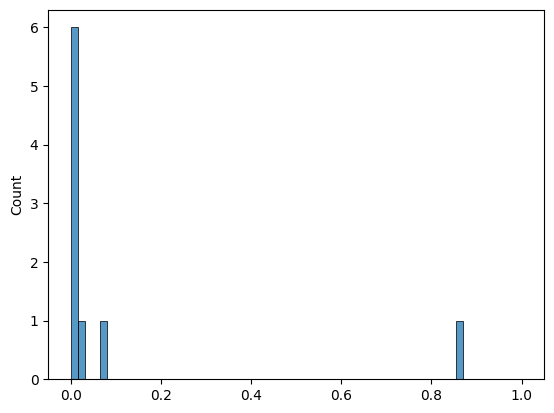

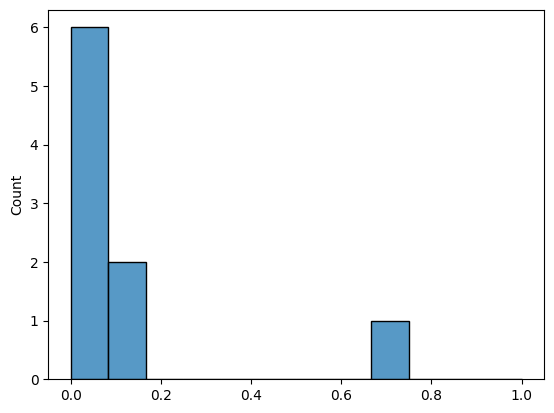

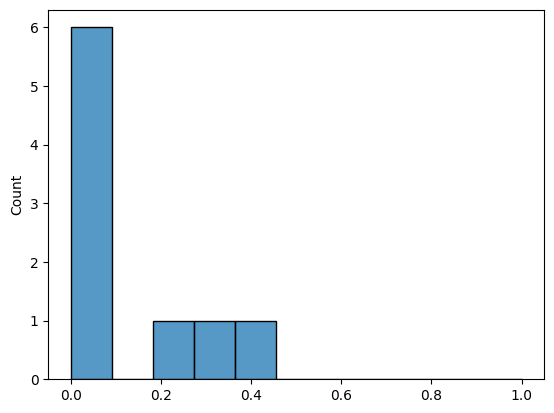

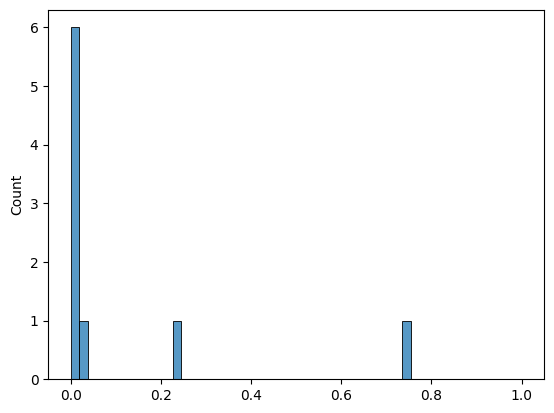

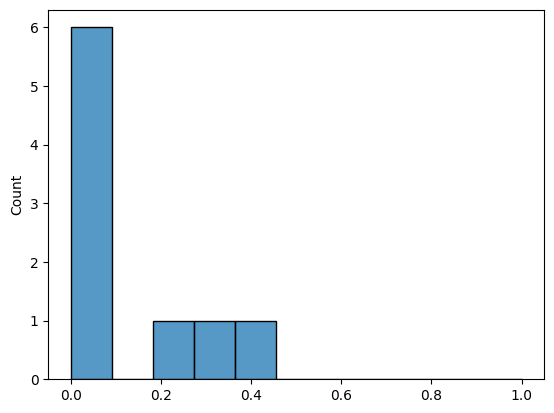

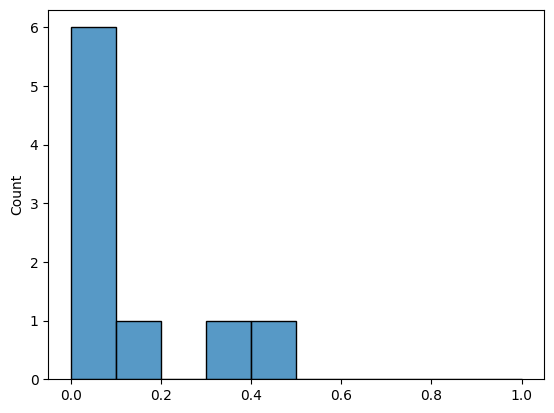

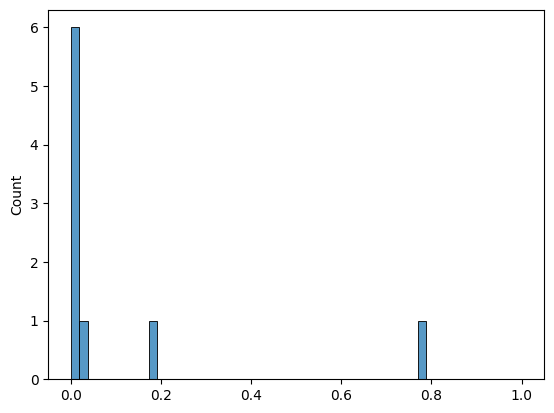

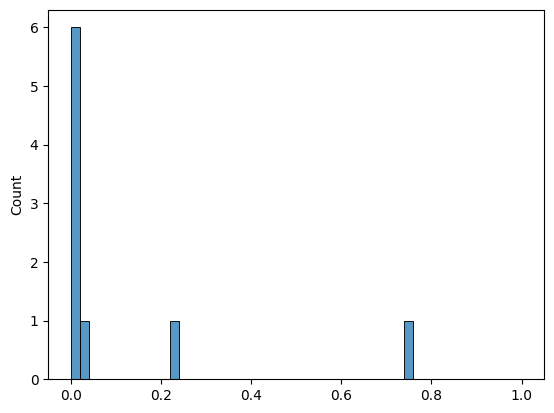

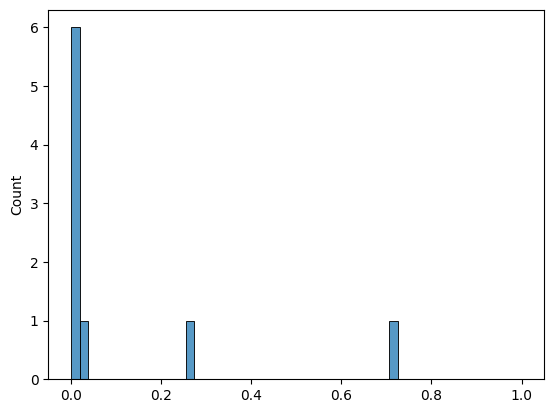

In [45]:
import matplotlib.pyplot as plt
import seaborn

for i in range(y_pred_level_1_proba.shape[1]):
    plt.figure()
    seaborn.histplot(y_pred_level_1_proba[i,:], binrange=[0, 1])

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_df.features.values.tolist(), train_df.coicop_number.values.tolist())

RandomForestClassifier()

In [25]:
import joblib

joblib.dump(rf, "random_forest_coicop_level_5.model")

['random_forest_coicop_level_5.model']

In [21]:
from sklearn.metrics import classification_report

rf_y_pred = rf.predict(test_df.features.values.tolist())
rf_report_df = pd.DataFrame(classification_report(test_df.coicop_number.values.tolist(), rf_y_pred, output_dict=True)).transpose()
rf_report_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
011110,0.200000,0.032787,0.056338,61.0
011120,0.363636,0.060060,0.103093,333.0
011130,0.486861,0.314506,0.382149,3240.0
011140,0.345920,0.504326,0.410367,5086.0
011150,0.365079,0.142857,0.205357,161.0


In [24]:
rf_report_df.tail()

,precision,recall,f1-score,support
123290,0.250000,0.025000,0.045455,40.000000
999999,0.211086,0.669308,0.320950,10475.000000
accuracy,0.285691,0.285691,0.285691,0.285691
macro avg,0.254575,0.080021,0.110614,54818.000000
weighted avg,0.361820,0.285691,0.252461,54818.000000


In [22]:
rf_report_df.to_csv("rf_classification_report.csv", sep=";")

## COCOP level 1

In [33]:
rf_coicop_level1 = RandomForestClassifier()
rf_coicop_level1.fit(train_df.features.values.tolist(), train_df.coicop_level_1.values.tolist())

RandomForestClassifier()

In [34]:
joblib.dump(rf_coicop_level1, "random_forest_coicop_level_1.model")

['random_forest_coicop_level_1.model']

In [35]:
from sklearn.metrics import classification_report

rf_level_1_y_pred = rf_coicop_level1.predict(test_df.features.values.tolist())
rf_report_level_1_df = pd.DataFrame(classification_report(test_df.coicop_level_1.values.tolist(), rf_level_1_y_pred, output_dict=True)).transpose()
rf_report_level_1_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
01,0.630528,0.946353,0.756813,30943.000000
02,0.742610,0.264045,0.389572,5518.000000
03,0.642651,0.334333,0.439842,667.000000
05,0.471429,0.109375,0.177556,2112.000000
06,0.228571,0.013699,0.025848,584.000000
08,0.000000,0.000000,0.000000,32.000000
09,0.481591,0.094020,0.157325,3478.000000
12,0.650685,0.094153,0.164502,1009.000000
99,0.309095,0.139189,0.191943,10475.000000
accuracy,0.603488,0.603488,0.603488,0.603488


In [36]:
rf_report_df.to_csv("rf_classification_report_level_1.csv", sep=";")

In [37]:
rf_level_1_y_pred_proba = rf_coicop_level1.predict_proba(test_df.features.values.tolist())
rf_level_1_y_pred_proba.shape

(54818, 9)

In [38]:
rf_level_1_y_pred_proba[:10]

array([[0.69166667, 0.07      , 0.01      , 0.06      , 0.01      ,
        0.        , 0.02      , 0.01      , 0.12833333],
       [0.79333333, 0.03      , 0.        , 0.01333333, 0.01      ,
        0.        , 0.03      , 0.04      , 0.08333333],
       [0.12      , 0.05      , 0.        , 0.02      , 0.02      ,
        0.        , 0.04      , 0.01      , 0.74      ],
       [0.97      , 0.        , 0.        , 0.01      , 0.        ,
        0.        , 0.        , 0.        , 0.02      ],
       [0.45      , 0.11      , 0.04      , 0.08      , 0.01      ,
        0.        , 0.12      , 0.03      , 0.16      ],
       [0.425     , 0.09      , 0.03      , 0.03      , 0.02      ,
        0.        , 0.155     , 0.02      , 0.23      ],
       [0.69      , 0.03      , 0.01      , 0.005     , 0.01      ,
        0.        , 0.025     , 0.03      , 0.2       ],
       [0.6675    , 0.01      , 0.04      , 0.03      , 0.        ,
        0.        , 0.04      , 0.01      , 0.2025    ],


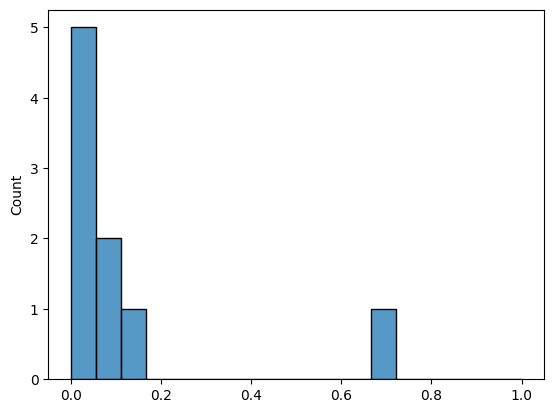

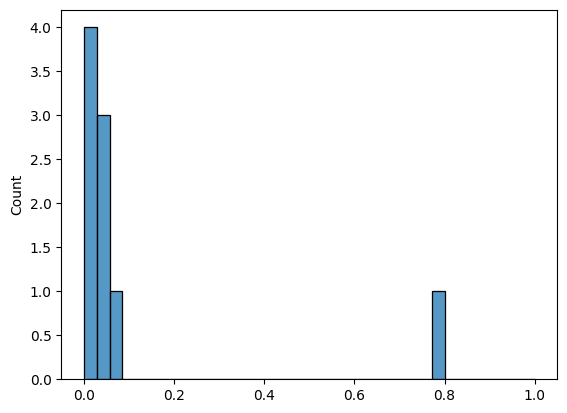

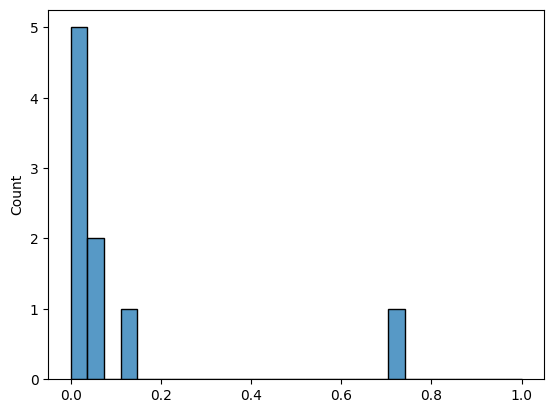

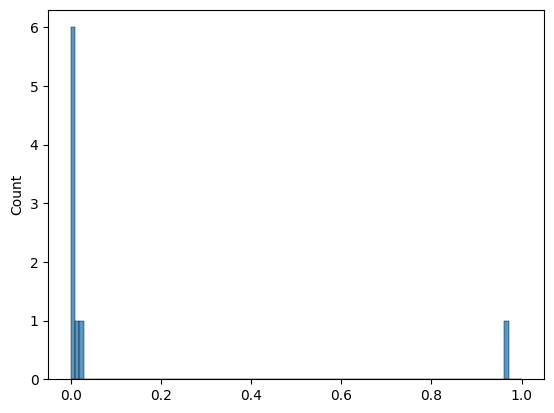

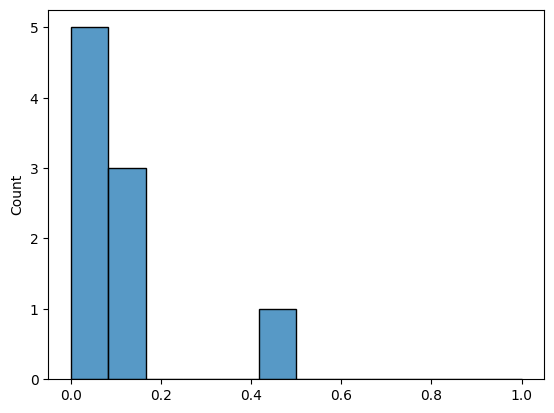

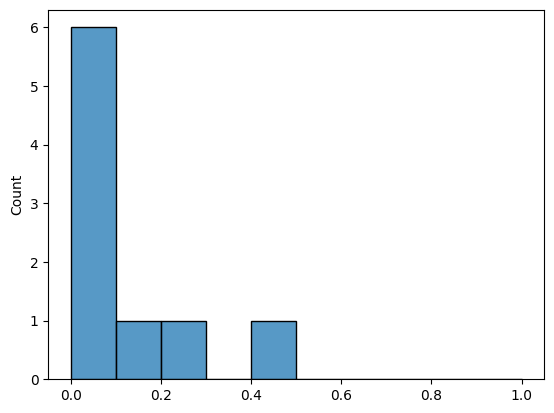

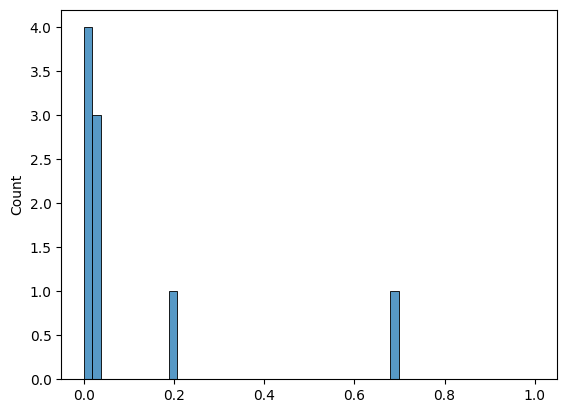

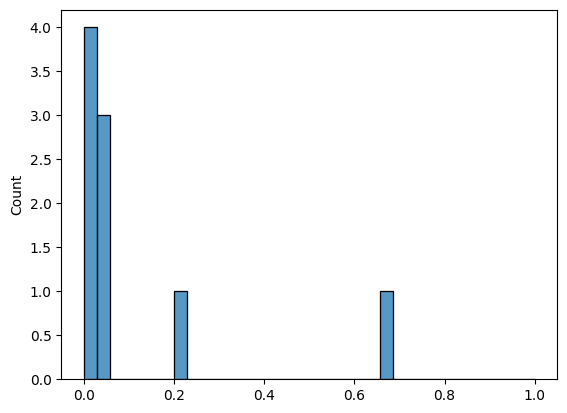

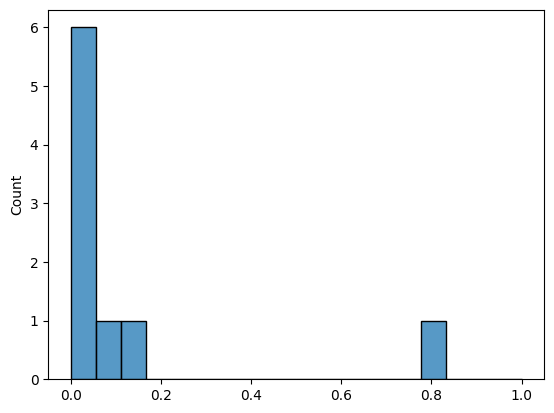

In [42]:
import matplotlib.pyplot as plt
import seaborn

for i in range(rf_level_1_y_pred_proba.shape[1]):
    plt.figure()
    seaborn.histplot(rf_level_1_y_pred_proba[i,:], binrange=[0, 1])

# Performance per supermarket

In [47]:
stores = hf_labse_features.store_id.unique()
stores

array(['470111', '470112', '901027', '908515'], dtype=object)

In [50]:
ah_data = hf_labse_features[(hf_labse_features.store_id == "470111") | (hf_labse_features.store_id == "470112")]
ah_data.head()

,store_id,year_month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,...,year,month,product_id,coicop_level_1,coicop_level_2,coicop_level_3,coicop_level_4,count,receipt_text,features
0,470111,202301,011110,Rijst,0111102201_011118001,Rijst,182200,basis rijst,58650694,5011157996592,...,2023,01,4013017697068537924,01,011,0111,01111,238,tilda rice,"[-0.0043613142, 0.0051457053, -0.0136071425, -..."
1,470111,202301,011110,Rijst,0111102201_011118001,Rijst,182200,basis rijst,4923416,8718781600624,...,2023,01,6123949729820683062,01,011,0111,01111,238,lassie built,"[0.009247524, -0.0064394698, 0.055344842, -0.0..."
2,470111,202301,011110,Rijst,0111102201_011118001,Rijst,182200,basis rijst,14857942,8718781601133,...,2023,01,-3771322195463238841,01,011,0111,01111,238,vliesrijst,"[0.051661454, -0.034952704, 0.030175127, -0.03..."
3,470111,202301,011110,Rijst,0111102201_011118001,Rijst,182200,basis rijst,58650708,8718781601706,...,2023,01,-2379360330508535683,01,011,0111,01111,238,lassie rijst,"[-0.016095372, -0.00132219, -0.0023241611, -0...."
5,470111,202301,011110,Rijst,0111102201_011118001,Rijst,182200,basis rijst,58650953,8718885740103,...,2023,01,7585963998682782188,01,011,0111,01111,238,pablos quino,"[-0.02415905, -0.036606673, 9.2752634e-05, -0...."


In [52]:
plus_data = hf_labse_features[hf_labse_features.store_id == "901027"]
plus_data.head()

,store_id,year_month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,...,year,month,product_id,coicop_level_1,coicop_level_2,coicop_level_3,coicop_level_4,count,receipt_text,features
0,901027,202203,011110,Rijst,11110701,Rijst,3711,Witte rijst,12742430,8710624475727,...,2022,03,-5090812329662242176,01,011,0111,01111,298,Snelkookrijst buil,"[0.073639534, 0.0011839342, -0.004512536, 0.01..."
1,901027,202203,011110,Rijst,11110701,Rijst,3711,Witte rijst,9539113,8710624701123,...,2022,03,3243999266577649169,01,011,0111,01111,298,Witte Rijst,"[0.043486416, -0.04831564, 0.028490454, 0.0081..."
2,901027,202203,011110,Rijst,11110701,Rijst,3711,Witte rijst,9573432,8710624865429,...,2022,03,-2599113672145145167,01,011,0111,01111,298,WITTE RIJST,"[-0.007603693, -0.04683903, -0.028496718, 0.00..."
3,901027,202203,011110,Rijst,11110701,Rijst,3711,Witte rijst,9564097,8710624931568,...,2022,03,4452068391797043079,01,011,0111,01111,298,1 Minuut witte rijst,"[0.024681542, -0.0036214108, 0.0042723417, -0...."
4,901027,202203,011110,Rijst,11110701,Rijst,3711,Witte rijst,9564098,8710624931575,...,2022,03,676954586733214782,01,011,0111,01111,298,1 Minuut zilv.rijst,"[0.0134892, 0.025312142, 0.0031079259, -0.0585..."


In [53]:
len(plus_data)

226594

In [54]:
lidl_data = hf_labse_features[hf_labse_features.store_id == "908515"]
lidl_data.head()

,store_id,year_month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,...,year,month,product_id,coicop_level_1,coicop_level_2,coicop_level_3,coicop_level_4,count,receipt_text,features
0,908515,201801,011110,Rijst,11110901,Rijst,47_40,Grund-/Nähr-/Hilfsmittel/Frühstück_Reis,3185518,92775.0,...,2018,01,3267751534058161652,01,011,0111,01111,56,Sushi rijst,"[-0.0531699, -0.0016801752, -0.044984374, -0.0..."
1,908515,201801,011110,Rijst,11110901,Rijst,47_40,Grund-/Nähr-/Hilfsmittel/Frühstück_Reis,3183385,22571.0,...,2018,01,-3564191818957410183,01,011,0111,01111,56,Italiaanse Risotto gesorteerd,"[0.0060355454, -0.029985929, 0.030211655, 0.02..."
2,908515,201801,011110,Rijst,11110901,Rijst,47_40,Grund-/Nähr-/Hilfsmittel/Frühstück_Reis,3183851,51009.0,...,2018,01,-4665729291832571192,01,011,0111,01111,56,Rijst zilvervlies 1kg,"[-0.0022523943, -0.048135452, 0.03755873, -0.0..."
3,908515,201801,011110,Rijst,11110901,Rijst,47_40,Grund-/Nähr-/Hilfsmittel/Frühstück_Reis,3183852,51010.0,...,2018,01,-9042628376296108328,01,011,0111,01111,56,Rijst wit 1kg,"[0.019218698, -0.060704023, 0.015803652, -0.04..."
4,908515,201801,011110,Rijst,11110901,Rijst,47_40,Grund-/Nähr-/Hilfsmittel/Frühstück_Reis,3183945,55571.0,...,2018,01,-6693002140100701691,01,011,0111,01111,56,Traditionele basmati rijst XXL,"[-0.0106688915, -0.032828845, 0.018882966, 0.0..."


In [55]:
len(lidl_data)

32579

In [57]:
def train_classifier(train_dataframe: pd.DataFrame, clf = RandomForestClassifier(), coicop_level: str = "coicop_level_1"):
    clf.fit(train_dataframe.features.values.tolist(), train_dataframe[coicop_level].values.tolist())
    return clf

def predict(clf, test_dataframe: pd.DataFrame, coicop_level: str = "coicop_level_1") -> pd.DataFrame:
    y_pred = clf.predict(test_dataframe.features.values.tolist())
    return pd.DataFrame(classification_report(test_dataframe[coicop_level].values.tolist(), y_pred, output_dict=True)).transpose()

def train_and_predict(dataframe: pd.DataFrame, clf = RandomForestClassifier(), coicop_level: str = "coicop_level_1", test_size: float = 0.2, random_state: int = 42):
    train_dataframe, test_dataframe = train_test_split(dataframe, test_size=0.2, stratify=dataframe[coicop_level], random_state=random_state)
    clf = train_classifier(train_dataframe, clf, coicop_level)
    return predict(clf, test_dataframe, coicop_level)


In [58]:
ah_predict = train_and_predict(ah_data)
ah_predict

,precision,recall,f1-score,support
01,0.546162,0.977439,0.700761,1507.0
02,0.708333,0.166259,0.269307,409.0
03,0.000000,0.000000,0.000000,18.0
05,0.578947,0.061453,0.111111,179.0
06,0.500000,0.021277,0.040816,47.0


In [59]:
ah_predict

,precision,recall,f1-score,support
01,0.546162,0.977439,0.700761,1507.00000
02,0.708333,0.166259,0.269307,409.00000
03,0.000000,0.000000,0.000000,18.00000
05,0.578947,0.061453,0.111111,179.00000
06,0.500000,0.021277,0.040816,47.00000
08,0.000000,0.000000,0.000000,1.00000
09,0.833333,0.234114,0.365535,299.00000
12,0.636364,0.075269,0.134615,93.00000
99,0.291667,0.048837,0.083665,430.00000
accuracy,0.553470,0.553470,0.553470,0.55347


In [61]:
plus_predict = train_and_predict(plus_data)
plus_predict

,precision,recall,f1-score,support
01,0.634184,0.943824,0.758625,26595.000000
02,0.698101,0.227389,0.343041,4688.000000
03,0.651515,0.280130,0.391800,307.000000
05,0.393443,0.073789,0.124272,1301.000000
06,0.125000,0.007797,0.014679,513.000000
08,0.000000,0.000000,0.000000,30.000000
09,0.498127,0.099180,0.165423,2682.000000
12,0.481481,0.038748,0.071724,671.000000
99,0.266418,0.100328,0.145764,8532.000000
accuracy,0.606832,0.606832,0.606832,0.606832


In [60]:
lidl_predict = train_and_predict(lidl_data)
lidl_predict

,precision,recall,f1-score,support
01,0.733243,0.954274,0.829283,2843.000000
02,0.968750,0.736342,0.836707,421.000000
03,0.744108,0.648094,0.692790,341.000000
05,0.618012,0.314873,0.417191,632.000000
06,0.000000,0.000000,0.000000,25.000000
09,0.653631,0.235412,0.346154,497.000000
12,0.924731,0.352459,0.510386,244.000000
99,0.457606,0.485129,0.470966,1513.000000
accuracy,0.672192,0.672192,0.672192,0.672192
macro avg,0.637510,0.465823,0.512935,6516.000000
